In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from matplotlib import style
# style.use('dark_background')

In [13]:
img1 = cv2.imread('lena.tif', 0)

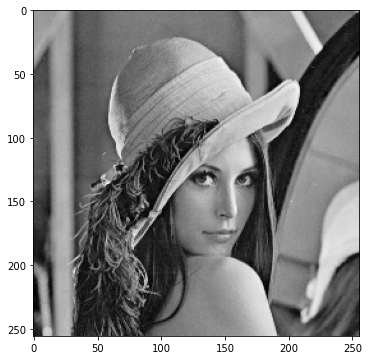

In [14]:
plt.figure(figsize=(12,6))
plt.imshow(img1, cmap = 'gray')
plt.show()

In [15]:
#Image output is a 2D complex array. 1st channel is real and 2nd imaginary. For FFT (fast Fourier transform) in OpenCV, 
#the input image needs to be converted to float32 and the output will be complex output, which means we need to extract 
#the magnitude out of this Complex number.

dft = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)

In [16]:
dft.shape

(256, 256, 2)

In [17]:
# Rearranges a Fourier transform by shifting the zero-frequency component to the center of the array. Otherwise,
#it starts at the top left corner of the image (array).

dft_shift1 = np.fft.fftshift(dft)

In [18]:
dft_shift1.shape

(256, 256, 2)

In [19]:
dft_shift1.dtype

dtype('float32')

In [20]:
#The magnitude of the function is 20. log(abs(f)), For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. dft_shift[:, :,0] will be a real part dft[:, :, 1] will be an imaginary
#part.

magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0], dft_shift1[:,:,1]) )

In [21]:
magnitude_spectrum1.shape

(256, 256)

In [22]:
magnitude_spectrum1.dtype

dtype('float32')

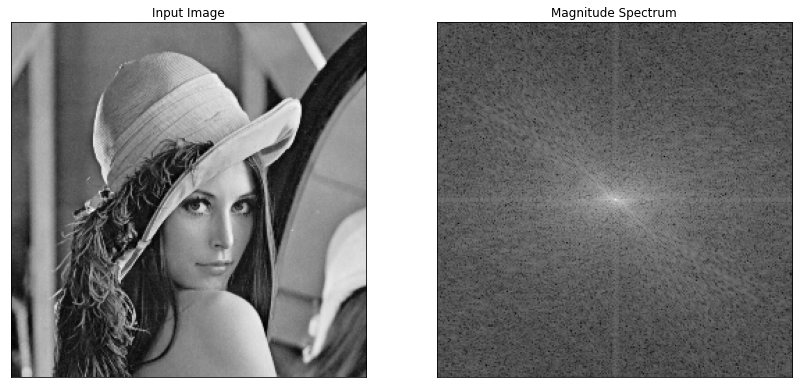

In [23]:
# visualize input image and the magnitude spectrum
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

# Another Example

In [13]:
img2 = cv2.imread('vegetable.jpg', 0)

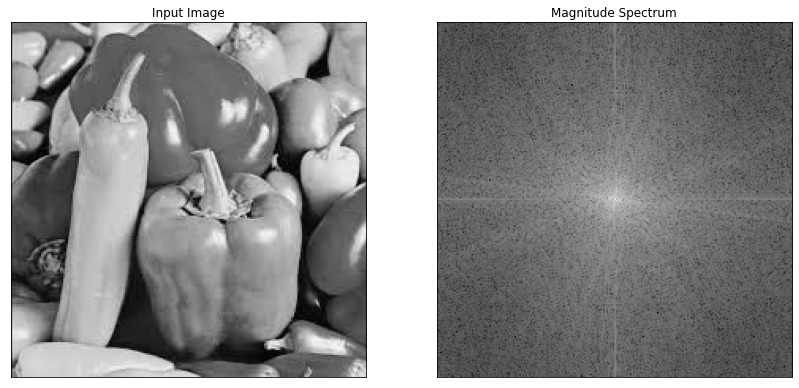

In [14]:
dft = cv2.dft(np.float32(img2),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft)
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0], dft_shift2[:,:,1]))
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img2, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

# Low Pass Filtering

In [15]:
# In this magnitude spectrum, we need to apply or block off all the central regions or central pixels. 
# Circular LPF(Low Pass Filter) mask, the center circle is 1, remaining pixels are zeros. 

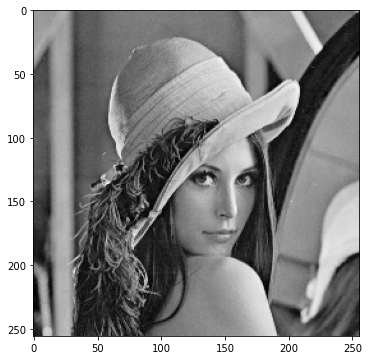

In [16]:
plt.figure(figsize=(12,6))
plt.imshow(img1, cmap = 'gray')
plt.show()

In [17]:
img1.shape

(256, 256)

In [18]:
rows, cols = img1.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.float32)

#Note that the the mask.shape is (rows, cols, 2) which matches the returned np.ndarray from cv2.dft().
r = 60
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

In [19]:
mask.shape

(256, 256, 2)

In [20]:
mask.dtype

dtype('float32')

In [21]:
mask_to_plot = cv2.magnitude(mask[:,:,0] ,mask[:,:,1])

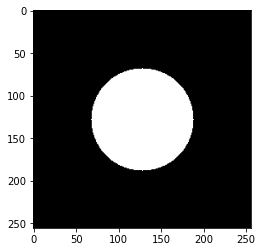

In [22]:
plt.imshow(mask_to_plot, cmap = 'gray')
plt.show()

In [23]:
# apply mask and inverse DFT
fshift = dft_shift1 * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

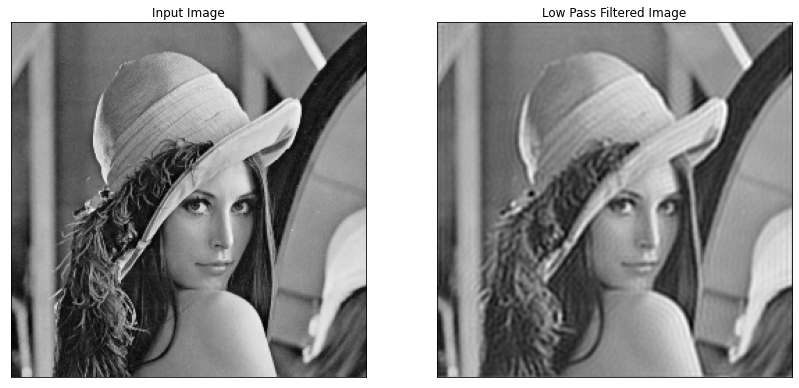

In [24]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()      

# High Pass Filtering

In [25]:
rows, cols = img1.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 0, remaining all ones
HPF = np.ones((rows, cols, 2), np.float32)

#Note that the the mask.shape is (rows, cols, 2) which matches the returned np.ndarray from cv2.dft().
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
HPF_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
HPF[HPF_area] = 0

In [26]:
HPF_to_plot = cv2.magnitude(HPF[:,:,0], HPF[:,:,1])

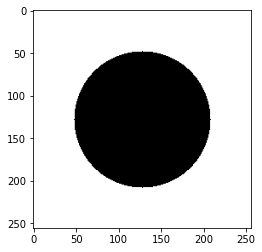

In [27]:
plt.imshow(HPF_to_plot, cmap = 'gray')
plt.show()

In [28]:
fshift = dft_shift1 * HPF
f_ishift = np.fft.ifftshift(fshift)
img_back_HPF = cv2.idft(f_ishift)
img_back_HPF = cv2.magnitude(img_back_HPF[:,:,0],img_back_HPF[:,:,1])

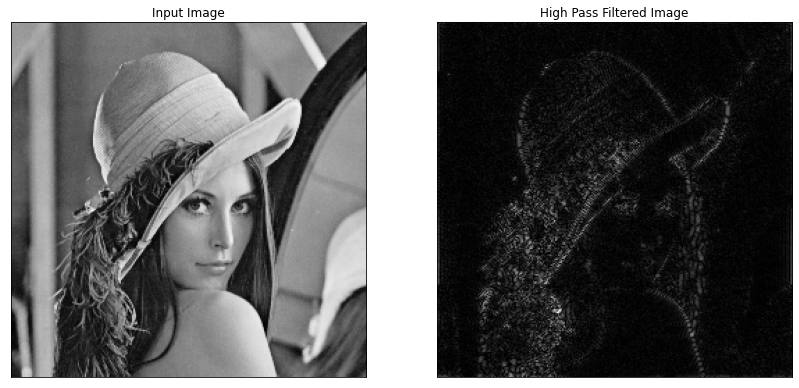

In [29]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back_HPF, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()      

# High boost Filter is a High Pass Filter

In [50]:
HighBoostFilter = np.array([[-1, -1, -1], 
                            [-1, 8, -1], 
                            [-1, -1, -1]])

In [51]:
HighBoostFilter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [52]:
dft_boost = cv2.dft(np.float32(HighBoostFilter),flags = cv2.DFT_COMPLEX_OUTPUT)

In [53]:
dft_shift_boost = np.fft.fftshift(dft_boost)

In [54]:
magnitude_spectrum_boost = cv2.magnitude(dft_shift_boost[:,:,0], dft_shift_boost[:,:,1]) 

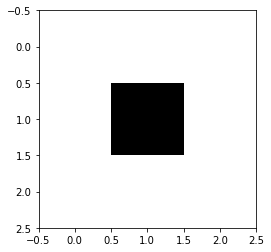

In [55]:
plt.imshow(magnitude_spectrum_boost, cmap = 'gray')
plt.show()

# Understanding np.ogrid

In [35]:
x, y = np.ogrid[:5, 12:17]
print(x)
print(" ")
print(y)
print(" ")
print(x.shape)
print(" ")
print(y.shape)


[[0]
 [1]
 [2]
 [3]
 [4]]
 
[[12 13 14 15 16]]
 
(5, 1)
 
(1, 5)
